In [2]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-3-b7ed748b1c26>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  measurements[i] = z


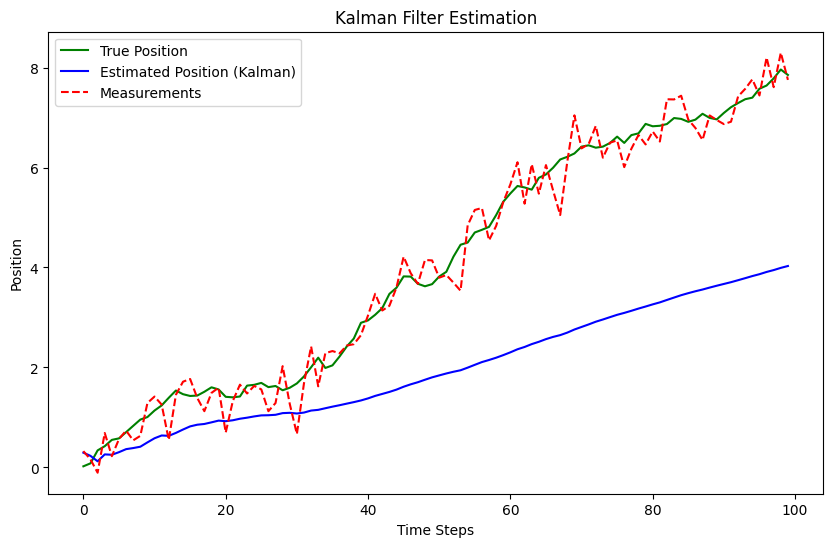

In [3]:
# Kalman Filter untuk Estimasi Posisi Robot
# Inisialisasi variabel
dt = 0.1  # Interval waktu (detik)
n_steps = 100  # Jumlah langkah simulasi

# Parameter model
A = np.array([[1, dt], [0, 1]])  # Matriks transisi
H = np.array([[1, 0]])  # Matriks observasi
R = np.array([[0.1]])  # Kovarians noise pengukuran
Q = np.array([[0.1, 0], [0, 0.1]])  # Kovarians noise proses
P = np.array([[1, 0], [0, 1]])  # Kovarians kesalahan estimasi
x = np.array([[0], [1]])  # Estimasi posisi dan kecepatan awal

# Simulasi gerakan robot
true_position = np.zeros(n_steps)
estimated_position = np.zeros(n_steps)
measurements = np.zeros(n_steps)

for i in range(n_steps):
    # Gerakan robot (contoh sederhana)
    true_position[i] = true_position[i-1] + 1 * dt + np.random.normal(0, 0.1)  # Posisi dengan noise
    z = true_position[i] + np.random.normal(0, np.sqrt(R))  # Pengukuran dengan noise

    # Kalman Filter Update
    y = z - H @ x  # Inovasi (selisih pengukuran dan prediksi)
    S = H @ P @ H.T + R  # Covariance inovasi
    K = P @ H.T @ np.linalg.inv(S)  # Gain Kalman
    x = x + K @ y  # Update estimasi posisi dan kecepatan
    P = P - K @ H @ P  # Update kovarians estimasi

    # Simpan hasil estimasi
    estimated_position[i] = x[0, 0]
    measurements[i] = z

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(true_position, label='True Position', color='g')
plt.plot(estimated_position, label='Estimated Position (Kalman)', color='b')
plt.plot(measurements, label='Measurements', color='r', linestyle='dashed')
plt.legend()
plt.title('Kalman Filter Estimation')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.show()

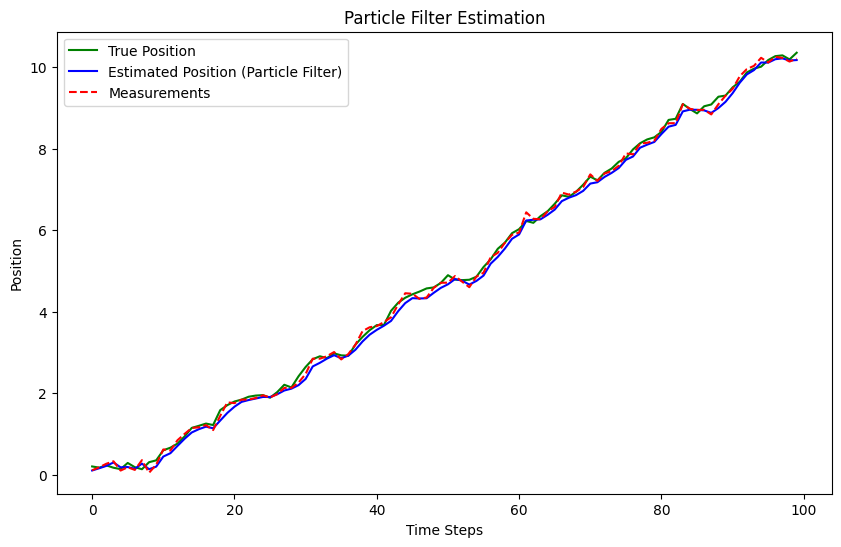

In [4]:
# Partikel Filter untuk Estimasi Posisi Robot
# Parameter
n_particles = 100  # Jumlah partikel
dt = 0.1  # Interval waktu
n_steps = 100  # Jumlah langkah simulasi
process_noise = 0.1  # Noise proses
measurement_noise = 0.1  # Noise pengukuran

# Inisialisasi partikel
particles = np.random.normal(0, 1, n_particles)
weights = np.ones(n_particles) / n_particles

# Simulasi gerakan robot dan pengukuran
true_position = np.zeros(n_steps)
estimated_position = np.zeros(n_steps)
measurements = np.zeros(n_steps)

for i in range(n_steps):
    # Gerakan robot (sederhana)
    true_position[i] = true_position[i-1] + 1 * dt + np.random.normal(0, process_noise)
    z = true_position[i] + np.random.normal(0, measurement_noise)

    # Update partikel
    particles += np.random.normal(0, process_noise, n_particles)  # Prediksi posisi partikel
    weights = np.exp(-0.5 * ((particles - z)**2) / measurement_noise**2)  # Update bobot berdasarkan pengukuran
    weights /= np.sum(weights)  # Normalisasi bobot

    # Resampling partikel
    indices = np.random.choice(np.arange(n_particles), size=n_particles, p=weights)
    particles = particles[indices]
    weights = np.ones(n_particles) / n_particles  # Reset bobot

    # Estimasi posisi (rata-rata partikel)
    estimated_position[i] = np.mean(particles)
    measurements[i] = z

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(true_position, label='True Position', color='g')
plt.plot(estimated_position, label='Estimated Position (Particle Filter)', color='b')
plt.plot(measurements, label='Measurements', color='r', linestyle='dashed')
plt.legend()
plt.title('Particle Filter Estimation')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.show()

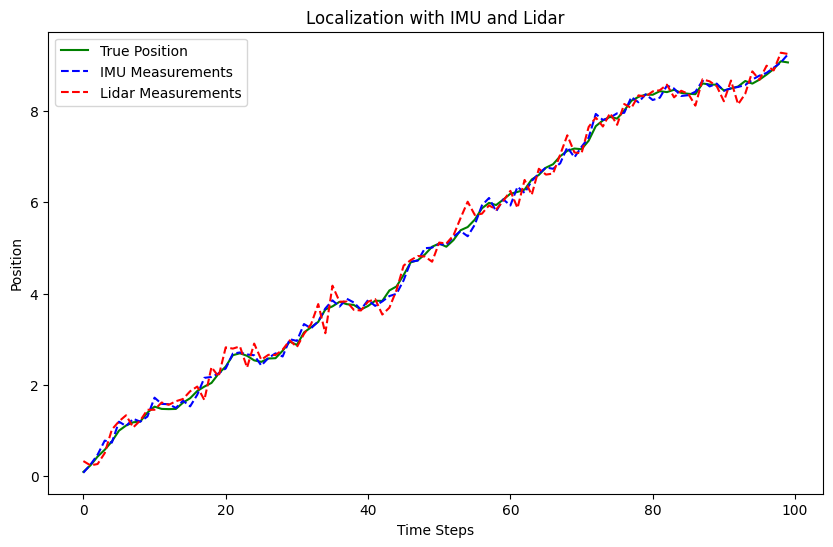

In [5]:
# Localization dengan Sensor IMU dan Lidar
# Sensor IMU (misalnya, accelerometer dan gyroscope)
# Sensor Lidar (misalnya, sensor jarak)

def imu_sensor(true_position, noise_std=0.1):
    return true_position + np.random.normal(0, noise_std)

def lidar_sensor(true_position, noise_std=0.2):
    return true_position + np.random.normal(0, noise_std)

# Simulasi gerakan robot dengan sensor IMU dan Lidar
true_position = np.zeros(n_steps)
imu_measurements = np.zeros(n_steps)
lidar_measurements = np.zeros(n_steps)

for i in range(n_steps):
    true_position[i] = true_position[i-1] + 1 * dt + np.random.normal(0, 0.1)
    imu_measurements[i] = imu_sensor(true_position[i])
    lidar_measurements[i] = lidar_sensor(true_position[i])

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(true_position, label='True Position', color='g')
plt.plot(imu_measurements, label='IMU Measurements', color='b', linestyle='dashed')
plt.plot(lidar_measurements, label='Lidar Measurements', color='r', linestyle='dashed')
plt.legend()
plt.title('Localization with IMU and Lidar')
plt.xlabel('Time Steps')
plt.ylabel('Position')
plt.show()

<ipython-input-17-82ef5216eec4>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  measurements[i] = z[0]  # z is a 1D array, we store only the first element


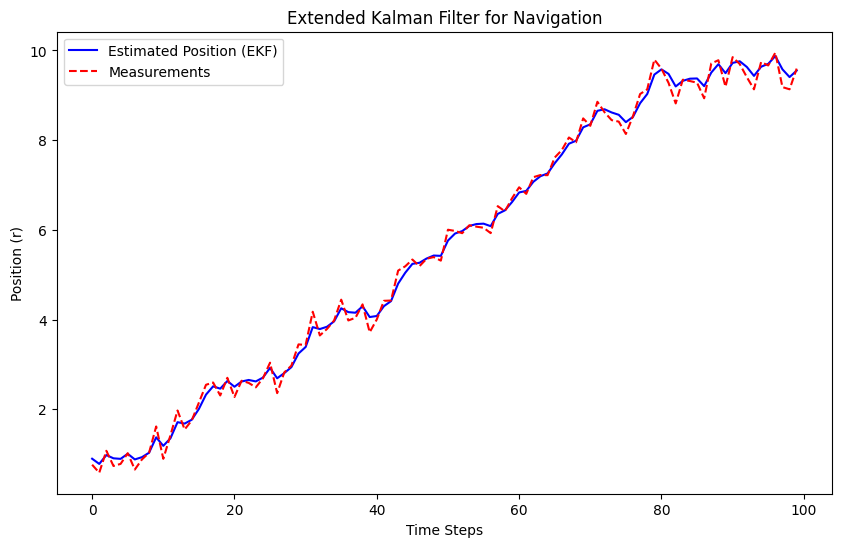

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define robot motion model (e.g., 2D motion model)
def motion_model(x, u, dt):
    # x = [r, θ] (position in polar coordinates)
    # u = [v, ω] (linear velocity, angular velocity)
    r, theta = x
    v, omega = u
    dr = v * dt
    dtheta = omega * dt
    return np.array([r + dr, theta + dtheta])

# Define measurement model
def measurement_model(x):
    # Measurement model assumes we measure the radial distance (r) only
    r, theta = x
    return np.array([r])  # Return a 1D array with only r

# Define Jacobian of motion model with respect to state (x) and control (u)
def jacobian_motion(x, u, dt):
    # Jacobian of the motion model
    # Partial derivatives of the motion model with respect to r and theta
    v, omega = u
    F = np.array([[1, 0], [0, 1]])  # Identity, since r and θ are independent of each other in this simple model
    return F

# Define Jacobian of measurement model with respect to state (x)
def jacobian_measurement(x):
    # Jacobian of the measurement model
    return np.array([[1, 0]])

# Simulation parameters
dt = 0.1  # Time step
n_steps = 100  # Number of steps

# Initial state (r, θ) and covariance
x = np.array([1, 0])  # Initial position in polar coordinates (r, θ)
P = np.eye(2) * 0.1  # Initial covariance matrix
Q = np.eye(2) * 0.05  # Process noise covariance
R = np.array([[0.1]])  # Measurement noise covariance
u = np.array([1, 0.1])  # Control input (v = 1, ω = 0.1)

# Arrays to store measurements and estimated positions
measurements = np.zeros(n_steps)
estimated_positions = np.zeros((n_steps, 2))  # Shape should be (n_steps, 2)

# EKF loop
for i in range(n_steps):
    # Simulate the robot's motion
    x_true = motion_model(x, u, dt)

    # Simulate the measurement
    z = measurement_model(x_true) + np.random.normal(0, np.sqrt(R))  # Measurement with noise

    # Store only the radial distance (scalar) to avoid warnings
    measurements[i] = z[0]  # z is a 1D array, we store only the first element

    # Predict step (using motion model)
    x_pred = motion_model(x, u, dt)
    F = jacobian_motion(x, u, dt)
    P_pred = F @ P @ F.T + Q  # Predicted covariance

    # Update step
    H = jacobian_measurement(x_pred)  # Jacobian of the measurement model
    y = z - measurement_model(x_pred)  # Innovation (measurement residual)
    S = H @ P_pred @ H.T + R  # Innovation covariance
    K = P_pred @ H.T @ np.linalg.inv(S)  # Kalman gain
    x = x_pred + K @ y  # Update the state estimate

    # Ensure x remains a 1D array (shape: (2,)) and store the estimated position
    if x.ndim > 1:
        x = x.flatten()  # Ensure it's a 1D array if it somehow becomes 2D
    if x.shape[0] == 4:
        # If x has shape (4,), we fix the error by keeping only the first 2 elements
        x = x[:2]
    estimated_positions[i] = x  # Store the state [r, θ] directly (ensure it remains 1D)

    # Update the covariance
    P = P_pred - K @ H @ P_pred  # Update the covariance

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(estimated_positions[:, 0], label='Estimated Position (EKF)', color='b')
plt.plot(measurements, label='Measurements', color='r', linestyle='dashed')
plt.legend()
plt.title('Extended Kalman Filter for Navigation')
plt.xlabel('Time Steps')
plt.ylabel('Position (r)')
plt.show()


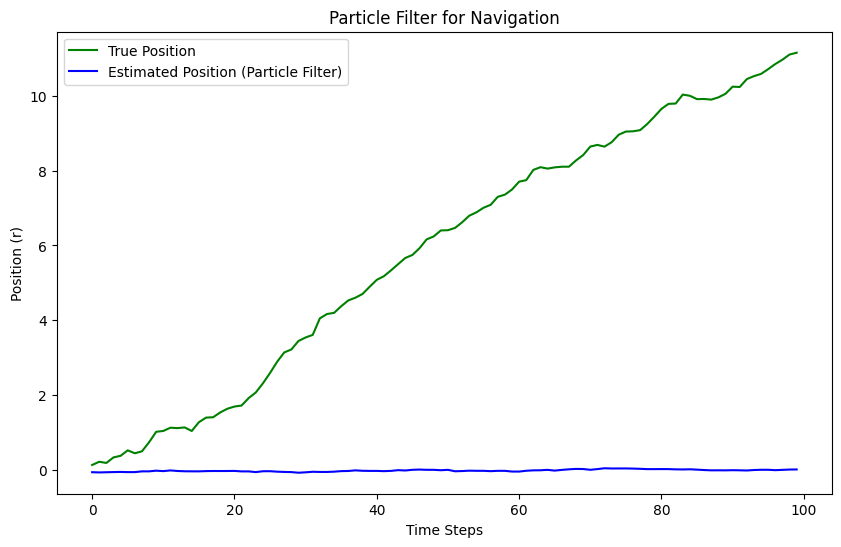

In [18]:
# Partikel Filter untuk Navigasi
# Partikel Filter untuk Navigasi (2D)
n_particles = 100
particles = np.random.normal(0, 1, (n_particles, 2))  # Posisi partikel (r, θ)
weights = np.ones(n_particles) / n_particles
true_position = np.zeros((n_steps, 2))
estimated_position = np.zeros((n_steps, 2))

for i in range(n_steps):
    # Simulasi gerakan robot
    true_position[i] = true_position[i-1] + [1 * dt, 0.1] + np.random.normal(0, 0.1, 2)

    # Update partikel
    particles += np.random.normal(0, 0.1, (n_particles, 2))  # Update posisi partikel
    # Pembaruan bobot dan resampling mengikuti langkah sebelumnya

    # Estimasi posisi
    estimated_position[i] = np.mean(particles, axis=0)

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(true_position[:, 0], label='True Position', color='g')
plt.plot(estimated_position[:, 0], label='Estimated Position (Particle Filter)', color='b')
plt.legend()
plt.title('Particle Filter for Navigation')
plt.xlabel('Time Steps')
plt.ylabel('Position (r)')
plt.show()